Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


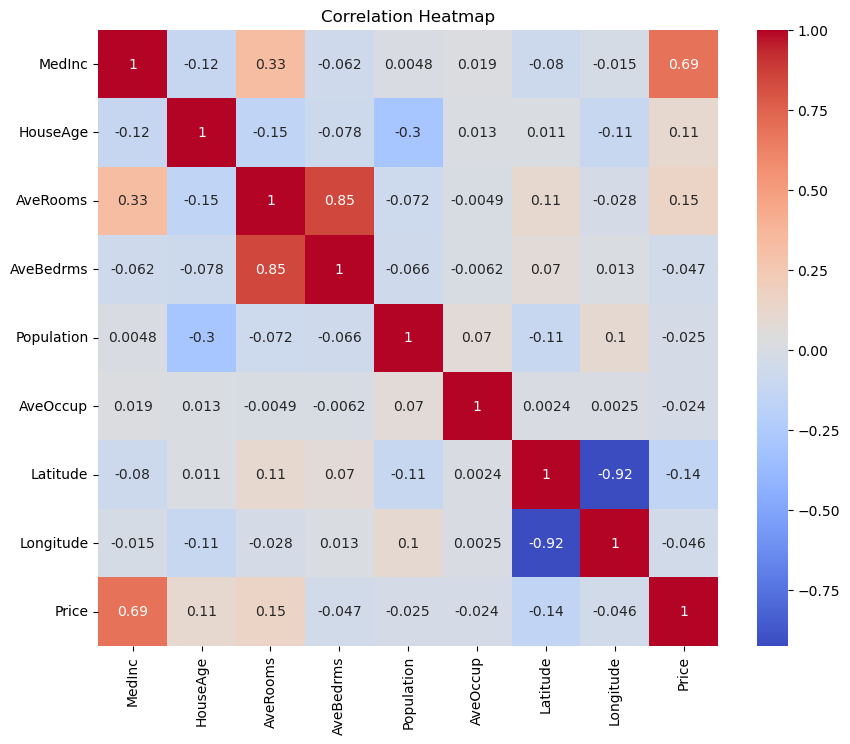

Linear Regression - RMSE: 0.75, R²: 0.58
Random Forest - RMSE: 0.51, R²: 0.81


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

# Data Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Price', axis=1))
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering: Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Training: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Training: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return y_pred

# Evaluate models
lr_pred = evaluate_model(lr_model, X_test, y_test, "Linear Regression")
rf_pred = evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Random Forest Cross-Validation R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Visualization: Actual vs Predicted Prices (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Feature Importance (Random Forest)
feature_importance = pd.Series(rf_model.feature_importances_, index=data.feature_names)
feature_importance.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance (Random Forest)')
plt.show()

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")